# Moving Average Crossover

## Simple Moving Average

### Theory

**SMA** is a technical indicator used to smooth out price data and identify trends. \
Formula:
$$
\text{SMA}_n=\frac{\sum_{i=1}^{n}\text{P}_i}{n}
$$
where \
n - num of periods \
$P_i$ - price of period

### Fetch data

In [14]:
import backtester

sma_data = backtester.download_stock_data('^GSPC', '6mo', '1d')

/Users/mikolaj/Desktop/PROJEKTY/StockMarket/MeanReversion/backtester.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


In [15]:
print(sma_data)

Price             Close         High          Low         Open      Volume
Date                                                                      
2025-02-21  6013.129883  6114.819824  6008.560059  6114.100098  5434560000
2025-02-24  5983.250000  6043.649902  5977.830078  6026.689941  4990120000
2025-02-25  5955.250000  5992.649902  5908.490234  5982.729980  5374690000
2025-02-26  5956.060059  6009.819824  5932.689941  5970.870117  4869580000
2025-02-27  5861.569824  5993.689941  5858.779785  5981.879883  5057680000
...                 ...          ...          ...          ...         ...
2025-08-14  6468.540039  6473.919922  6441.069824  6453.459961  4462050000
2025-08-15  6449.799805  6481.339844  6441.850098  6477.379883  4575060000
2025-08-18  6449.149902  6455.350098  6437.700195  6445.020020  4162290000
2025-08-19  6411.370117  6456.479980  6400.220215  6446.240234  4377440000
2025-08-20  6395.779785  6408.399902  6343.859863  6406.620117  3002532000

[125 rows x 5 columns]


### Prepare data to Moving Average Crossover

In [16]:
sma_data['SMA_20'] = sma_data['Close'].rolling(window=20).mean()
sma_data['SMA_50'] = sma_data['Close'].rolling(window=50).mean()

In [17]:
print(sma_data.tail())

Price             Close         High          Low         Open      Volume  \
Date                                                                         
2025-08-14  6468.540039  6473.919922  6441.069824  6453.459961  4462050000   
2025-08-15  6449.799805  6481.339844  6441.850098  6477.379883  4575060000   
2025-08-18  6449.149902  6455.350098  6437.700195  6445.020020  4162290000   
2025-08-19  6411.370117  6456.479980  6400.220215  6446.240234  4377440000   
2025-08-20  6395.779785  6408.399902  6343.859863  6406.620117  3002532000   

Price            SMA_20       SMA_50  
Date                                  
2025-08-14  6359.090527  6218.233203  
2025-08-15  6366.741016  6227.812998  
2025-08-18  6373.918506  6238.010000  
2025-08-19  6379.006006  6246.230205  
2025-08-20  6380.849487  6254.028203  


### Plot candlestick chart + SMA 20 days & 50 days

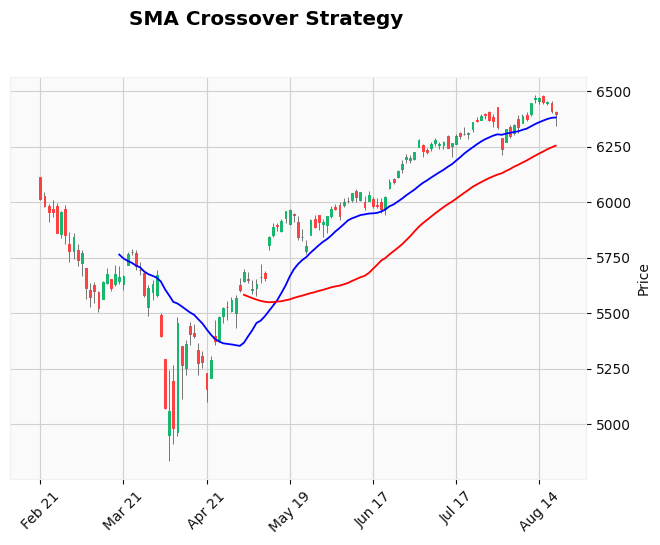

In [20]:
import mplfinance as mpf

ap = [
    mpf.make_addplot(sma_data['SMA_20'], color='blue'),
    mpf.make_addplot(sma_data['SMA_50'], color='red'),
]

mpf.plot(
    sma_data,
    type='candle',
    style='yahoo',
    title='SMA Crossover Strategy',
    ylabel='Price',
    addplot=ap
)

## Exponential Moving Average

### Theory

**EMA** is a type of moving average which is used to smooth out price data and identify trends. It gives more weight to recent prices and making it more responsive to new information and price changes. \
Formula:
$$
\text{EMA}_i=\text{EMA}_{i-1} + \alpha(\text{P}_i-\text{EMA}_{i-1})
$$
where \
n - num of periods \
$\alpha=\frac{2}{n+1}$ - smoothing factor \
$\text{P}_i$ - price of period
